In [5]:
from pandas import pandas
from data_all import universities, universities_details
pandas.set_option('display.max_colwidth', None)
program_df = pandas.DataFrame(universities_details)
program_df.head(2)


,name,country,longitude,latitude
0,University of Cape Town,South Africa,-18.4719,-33.9628
1,Stellenbosch University,South Africa,-18.8679,-33.9321


In [6]:
seen_universities = set()
unique_universities = []
print(len(universities_details))
for university in universities_details:
    # print(university)
    university_name = university.get("name")
    if university_name not in seen_universities:
        seen_universities.add(university_name)
        unique_universities.append(university)

program_df = pandas.DataFrame(unique_universities)
 
print(len(program_df))
# universities_details.head(2)


program_df.loc[program_df['name'] == 'Stellenbosch University', ['Longitude', 'Latitude']] = [18.8679, -33.9321]
program_df.loc[program_df['name'] == 'University of Cape Town', ['Longitude', 'Latitude']] = [18.4719, -33.9628]


144
74


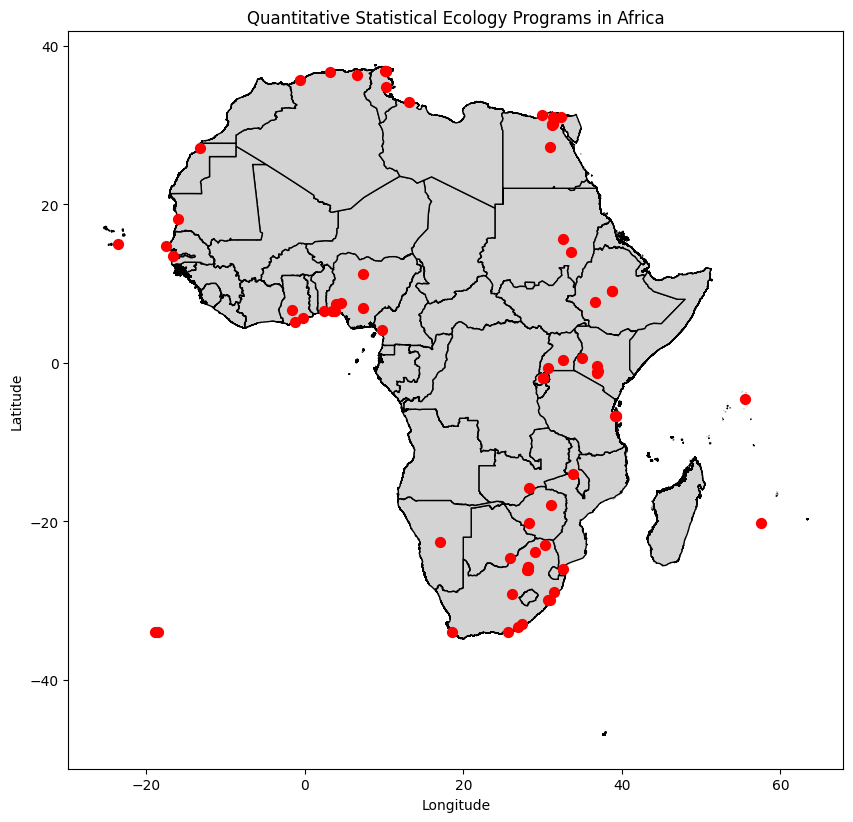

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile or GeoJSON file of African country boundaries
africa_shapefile = "/Users/asmaatbaeen/Desktop/codePhD/Ch1/afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the actual file path
  
longitudes = program_df["longitude"]
latitudes = program_df["latitude"]
# Create a GeoDataFrame from latitude and longitude values
geometry = gpd.points_from_xy(longitudes, latitudes)
program_gdf = gpd.GeoDataFrame(program_df, geometry=geometry)

# Read shapefile of African country boundaries
africa_gdf = gpd.read_file(africa_shapefile)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot African country boundaries
africa_gdf.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot quantitative statistical ecology program locations
program_gdf.plot(ax=ax, color="red", markersize=50)

# Set plot title and labels
ax.set_title("Quantitative Statistical Ecology Programs in Africa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


In [8]:
# import geopandas as gpd
# import folium
# import selenium
# from folium.plugins import FloatImage
# from selenium import webdriver
 
# # Create a map centered around Africa
# m = folium.Map(location=[0, 25], zoom_start=3)

# # Add markers for program locations with names
# for idx, program in program_df.iterrows():
#     folium.Marker(
#         location=[program["Latitude"], program["Longitude"]],
#         popup=program["University"],
#         icon=folium.Icon(icon="university", prefix="fa")
#     ).add_to(m)

#     # Add program name as a label
#     folium.Marker(
#         location=[program["Latitude"], program["Longitude"]],
#         icon=folium.DivIcon(
#             icon_size=(150, 36),
#             icon_anchor=(0, 0),
#             html=f'<div style="font-size: 12pt">{program["University"]}</div>'
#         )
#     ).add_to(m)

# # Save the map as an HTML file
# m.save("quantitative_statistical_ecology_programs.html")
# m

In [9]:
# import pandas as pd

# # Specify the file path of the CSV file
# csv_file = "aa.csv"

# # Read the CSV file into a pandas DataFrame
# df = pd.read_csv(csv_file)

# # Extract the university names from the DataFrame
# universities = df["University"].tolist()

# # Print the list of universities
# print(universities)


In [10]:
import universities

uni = universities.API() # can specify encoding for use in Python 2

canadian = uni.search(country = "Canada")
only_mit = uni.search(domain = "mit.edu")
all_data = uni.get_all()
waterloo = uni.lucky(name = "Waterloo") # As in "I'm feeling lucky"
df = pd.DataFrame(all_data)
# df

# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()
# Let's fetch the list of nations of Europe.
nations_of_Africa = my_world.get_countries_list_of('Africa')
 
# nations_of_Africa
print(df.dtypes)
df = df.astype(str)
print(df.dtypes)
 

NameError: name 'pd' is not defined

In [ ]:
# print(df[0].dtypes)
df[0] = df[0].astype(str)
# print(df[0].dtypes)
 
df

,0
0,Name: Kharkiv National University\nCountry: Ukraine\nDomains:\n - student.karazin.ua\n - karazin.ua\nWeb Pages:\n - https://karazin.ua\n
1,Name: Universidad Técnica Federico Santa María\nCountry: Chile\nDomains:\n - usm.cl\nWeb Pages:\n - https://usm.cl\n
2,Name: IÉSEG School of Management\nCountry: France\nDomains:\n - ieseg.fr\nWeb Pages:\n - https://ieseg.fr\n
3,Name: Sun Yat-Sen University\nCountry: China\nDomains:\n - mail2.sysu.edu.cn\n - mail.sysu.edu.cn\nWeb Pages:\n - https://sysu.edu.cn\n
4,Name: Royal Holloway University of London\nCountry: United Kingdom\nDomains:\n - rhul.ac.uk\nWeb Pages:\n - https://rhul.ac.uk\n
...,...
9903,Name: Rajalakshmi Engineering College\nState: Tamil Nadu\nCountry: India\nDomains:\n - rajalakshmi.org\nWeb Pages:\n - https://www.rajalakshmi.org/\n
9904,Name: St Joseph's College Of Engineering\nState: Tamil Nadu\nCountry: India\nDomains:\n - stjosephs.ac.in\nWeb Pages:\n - https://stjosephs.ac.in/\n
9905,Name: St Joseph's Institute Of Technology\nState: Tamil Nadu\nCountry: India\nDomains:\n - stjosephstechnology.ac.in\nWeb Pages:\n - https://www.stjosephstechnology.ac.in/\n
9906,Name: Sri Sivasubramaniya Nadar Institutions\nState: Tamil Nadu\nCountry: India\nDomains:\n - ssn.edu.in\nWeb Pages:\n - https://www.ssn.edu.in/\n


In [ ]:
df_ex = pd.DataFrame()

# Create new columns for each information category
df_ex[['Name', 'State', 'Country', 'Domains', 'Web Pages']] = df[0].str.extract(r'Name: (.*)\nState: (.*)\nCountry: (.*)\nDomains:\n - (.*)\nWeb Pages:\n - (.*)\n')

# Drop the original "info" column
df_ex 


,Name,State,Country,Domains,Web Pages
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9903,Rajalakshmi Engineering College,Tamil Nadu,India,rajalakshmi.org,https://www.rajalakshmi.org/
9904,St Joseph's College Of Engineering,Tamil Nadu,India,stjosephs.ac.in,https://stjosephs.ac.in/
9905,St Joseph's Institute Of Technology,Tamil Nadu,India,stjosephstechnology.ac.in,https://www.stjosephstechnology.ac.in/
9906,Sri Sivasubramaniya Nadar Institutions,Tamil Nadu,India,ssn.edu.in,https://www.ssn.edu.in/
